In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
audio_data = "./data/audio_and_txt_files/"
disease_data =  pd.read_csv('./data/patient_diagnosis.csv',names=['id','disease'])

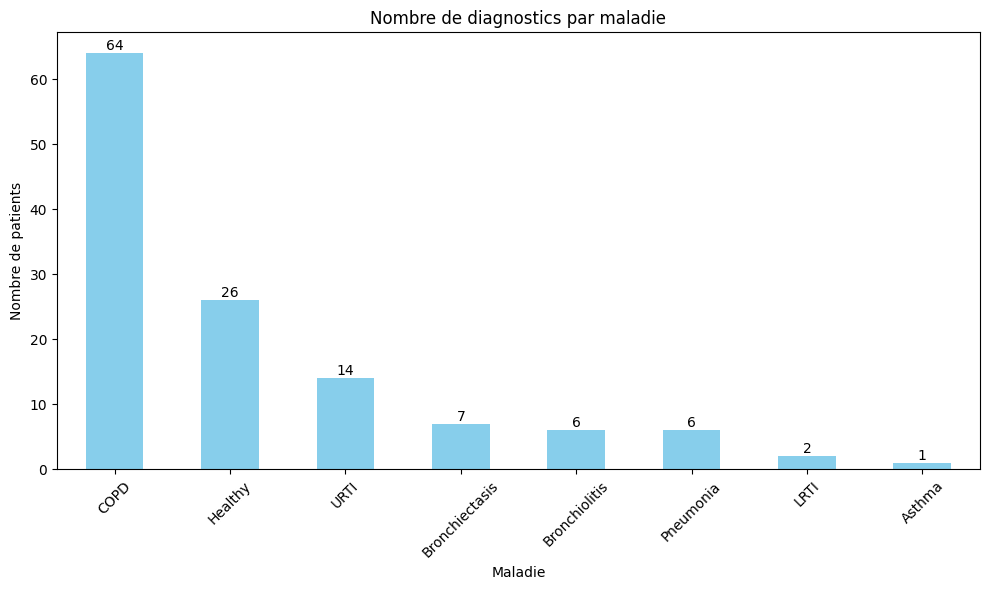

In [ ]:
disease_counts = disease_data['disease'].value_counts()

# hist
plt.figure(figsize=(10, 6))
bars = disease_counts.plot(kind='bar', color='skyblue')

# nombre exact de patient
for index, value in enumerate(disease_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# labels
plt.title('Nombre de diagnostics par maladie')
plt.xlabel('Maladie')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [21]:
import os


path='./data/audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [22]:
files

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200',
 '104_1b1_Ar_sc_Litt3200',
 '104_1b1_Ll_sc_Litt3200',
 '104_1b1_Lr_sc_Litt3200',
 '104_1b1_Pl_sc_Litt3200',
 '104_1b1_Pr_sc_Litt3200',
 '105_1b1_Tc_sc_Meditron',
 '106_2b1_Pl_mc_LittC2SE',
 '106_2b1_Pr_mc_LittC2SE',
 '107_2b3_Al_mc_AKGC417L',
 '107_2b3_Ar_mc_AKGC417L',
 '107_2b3_Ll_mc_AKGC417L',
 '107_2b3_Lr_mc_AKGC417L',
 '107_2b3_Pl_mc_AKGC417L',
 '107_2b3_Pr_mc_AKGC417L',
 '107_2b3_Tc_mc_AKGC417L',
 '107_2b4_Al_mc_AKGC417L',
 '107_2b4_Ar_mc_AKGC417L',
 '107_2b4_Ll_mc_AKGC417L',
 '107_2b4_Lr_mc_AKGC417L',
 '107_2b4_Pl_mc_AKGC417L',
 '107_2b4_Pr_mc_AKGC417L',
 '107_2b4_Tc_mc_AKGC417L',
 '107_2b5_Al_mc_AKGC417L',
 '107_2b5_Ar_mc_AKGC417L',
 '107_2b5_Ll_mc_AKGC417L',
 '107_2b5_Lr_mc_AKGC417L',
 '107_2b5_Pl_mc_AKGC417L',
 '107_2b5_Pr_mc_AKGC417L',
 '107_2b5_Tc_mc_AKGC417L',
 '107_3p2_Al_mc_AKGC417L',
 '107_3p2_Ar_mc_AKGC417L',
 '107_3p2_Ll_mc_AKGC417L',
 

In [33]:
import librosa
import numpy as np


def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [ ]:
def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()